Data is food for AI. In one of the talks, Prof Andrew Ng explains the first principle of data-centric AI, i.e.,  "make y labels consistent". He takes the example of a classification task wherein defective pills are separated from the good ones on the basis of scratch lengths. In this notebook, we show the application of the same concept for anomaly detection in a time series. We select a representative time series of memory utilization to discuss how and why a data-centric approach can outperform a plain model-centric approach. 

### 1. Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
import pandas as pd

2022-04-05 12:26:42.666241: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-05 12:26:42.666287: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### 2. Read the data

There are three columns in the data. The first column contains time indices. The second contains value of time series. Third column consists of labels. If the label is 0, then the value is normal else an anomaly. 

In [2]:
df1 = pd.read_csv("Ex1a.csv");

t = df1['time'].to_numpy();t=t.reshape(np.size(t),1);
y = df1['value'].to_numpy();y=y.reshape(np.size(y),1);
labels = df1['is_anom'].to_numpy();labels=labels.reshape(np.size(labels),1);
anom_ind=np.nonzero(labels)[0]

### 3. Plot the time series without anomaly labels

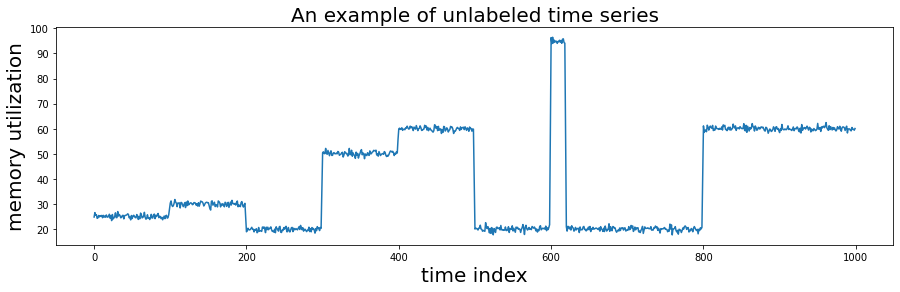

In [3]:
plt.figure(figsize=(15,4))
plt.plot(t,y);
plt.xlabel('time index', fontsize=20)
plt.ylabel('memory utilization', fontsize=20)
#plt.title('Questions: (A) Did you notice anything peculiar about the time series? (B) Can you mark anomalous points?');
plt.title('An example of unlabeled time series', fontsize=20);
plt.savefig("unlabeled_time_series.jpeg")
plt.show()

### 4. Add anomaly labels 

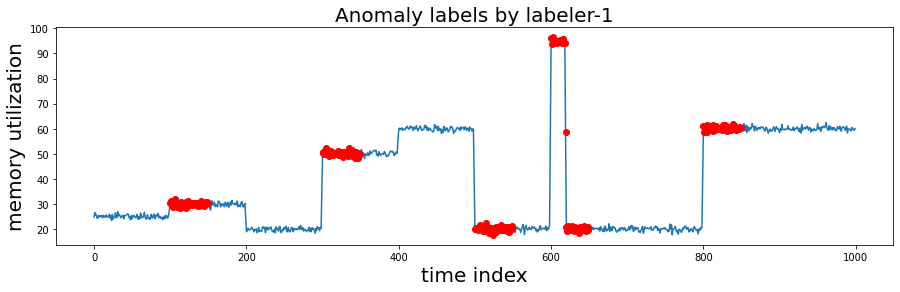

In [4]:
plt.figure(figsize=(15,4))
plt.plot(t,y);
plt.plot(anom_ind,y[anom_ind],'ro')
plt.xlabel('time index', fontsize=20)
plt.ylabel('memory utilization', fontsize=20)
#plt.title('Questions: (A) Do you agree with the labels? (B) What could be the logic behind this labeling?')
plt.title("Anomaly labels by labeler-1", fontsize=20)
plt.savefig("labeler_01.jpeg")
plt.show()

### 5. Data augmentation/ Feature engineering
Data augmentation is one of the main tools of data-centric as well as model-centric AI. In case of image applications, it is common to create more data by doing simple operatins on image like rotation, reflection, etc. In our case, we notice that the time series contains a lot of sharp level changes called change points. Therefore, in addition to the value of time series, the information of change in values should also be used to determine the anomaly labels. 

In [5]:
dy=np.zeros(np.shape(y))
for i in range(1,np.size(y)):
    dy[i]=np.abs(y[i]-y[i-1])

### 6. Model-centric AI
We know that, AI = Code + Data. Suppose we trust the human labeler (subject matter expert) and we want to represent his knowledge in a binary classifier network (anomalous or normal). We will keep the data and the labels fixed and only play with the code (i.e., parameters). Lets see what happens.

### 7. Training a binary classifier
Binary classification is one of the simplest ideas in machine learning. The details can be found here. In this tutorial, we will use tensorflow/keras. You can use other packages like PyTorch for this.  

### (A) Without augmentation

In [6]:
X=y; Y=labels;
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0);

model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape = (1,), activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=50, epochs=500)

2022-04-05 12:26:45.727976: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-05 12:26:45.728020: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-05 12:26:45.728060: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vikas-Inspiron-3558): /proc/driver/nvidia/version does not exist
2022-04-05 12:26:45.728284: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500
16/16 [==============================] - 1s 2ms/step - loss: 0.6545 - accuracy: 0.7412
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.7412
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6259 - accuracy: 0.7412
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 0.7412
Epoch 5/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6078 - accuracy: 0.7412
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.7412
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.7412
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.7412
Epoch 9/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.7412
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.7412
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.7500
Epoch 84/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5870 - accuracy: 0.7500
Epoch 85/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.7462
Epoch 86/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.7412
Epoch 87/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.7475
Epoch 88/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7437
Epoch 89/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7450
Epoch 90/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.7412
Epoch 91/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5732 - accuracy: 0.7450
Epoch 92/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5756 - accuracy: 0.7450
Epoch 93/500


16/16 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.7475
Epoch 165/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.7462
Epoch 166/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.7450
Epoch 167/500
16/16 [==============================] - 0s 3ms/step - loss: 0.5829 - accuracy: 0.7500
Epoch 168/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.7450
Epoch 169/500
16/16 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.7412
Epoch 170/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5706 - accuracy: 0.7437
Epoch 171/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.7425
Epoch 172/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.7487
Epoch 173/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5645 - accuracy: 0.7412
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.7525
Epoch 246/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5668 - accuracy: 0.7475
Epoch 247/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5628 - accuracy: 0.7437
Epoch 248/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5723 - accuracy: 0.7475
Epoch 249/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5702 - accuracy: 0.7450
Epoch 250/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5658 - accuracy: 0.7450
Epoch 251/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.7412
Epoch 252/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7500
Epoch 253/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7412
Epoch 254/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.7487
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 0.5675 - accuracy: 0.7487
Epoch 327/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7437
Epoch 328/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7412
Epoch 329/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5749 - accuracy: 0.7450
Epoch 330/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5647 - accuracy: 0.7475
Epoch 331/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.7437
Epoch 332/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.7412
Epoch 333/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5638 - accuracy: 0.7487
Epoch 334/500
16/16 [==============================] - 0s 3ms/step - loss: 0.5677 - accuracy: 0.7475
Epoch 335/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.7475
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.7425
Epoch 408/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.7412
Epoch 409/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7450
Epoch 410/500
16/16 [==============================] - 0s 3ms/step - loss: 0.5677 - accuracy: 0.7412
Epoch 411/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.7475
Epoch 412/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5657 - accuracy: 0.7412
Epoch 413/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7450
Epoch 414/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7500
Epoch 415/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5662 - accuracy: 0.7500
Epoch 416/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.7412
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7487
Epoch 489/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7412
Epoch 490/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.7425
Epoch 491/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7462
Epoch 492/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7425
Epoch 493/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5713 - accuracy: 0.7500
Epoch 494/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.7487
Epoch 495/500
16/16 [==============================] - 0s 3ms/step - loss: 0.5665 - accuracy: 0.7425
Epoch 496/500
16/16 [==============================] - 0s 3ms/step - loss: 0.5683 - accuracy: 0.7475
Epoch 497/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5651 - accuracy: 0.7437
Epoc

### (B) With augmentation

In [7]:
X=np.concatenate((y,dy),axis = 1); Y=labels;
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0);

model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape = (2,), activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=50, epochs=500)

Epoch 1/500
16/16 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.7088
Epoch 2/500
16/16 [==============================] - 0s 3ms/step - loss: 0.6425 - accuracy: 0.7425
Epoch 3/500
16/16 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.7412
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.7425
Epoch 5/500
16/16 [==============================] - 0s 3ms/step - loss: 0.6062 - accuracy: 0.7450
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.7450
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5914 - accuracy: 0.7450
Epoch 8/500
16/16 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.7425
Epoch 9/500
16/16 [==============================] - 0s 3ms/step - loss: 0.5995 - accuracy: 0.7437
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5883 - accuracy: 0.7425
Epoch 11/

16/16 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.7538
Epoch 84/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.7513
Epoch 85/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.7513
Epoch 86/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5735 - accuracy: 0.7538
Epoch 87/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5665 - accuracy: 0.7487
Epoch 88/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.7550
Epoch 89/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.7300
Epoch 90/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.7538
Epoch 91/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.7525
Epoch 92/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.7500
Epoch 93/500


16/16 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.7525
Epoch 165/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5661 - accuracy: 0.7475
Epoch 166/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5633 - accuracy: 0.7487
Epoch 167/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.7487
Epoch 168/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5606 - accuracy: 0.7525
Epoch 169/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.7538
Epoch 170/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7538
Epoch 171/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.7150
Epoch 172/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5629 - accuracy: 0.7563
Epoch 173/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5633 - accuracy: 0.7500
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.7487
Epoch 246/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.7487
Epoch 247/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.7487
Epoch 248/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5597 - accuracy: 0.7513
Epoch 249/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5614 - accuracy: 0.7513
Epoch 250/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.7475
Epoch 251/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5617 - accuracy: 0.7563
Epoch 252/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.7475
Epoch 253/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.7475
Epoch 254/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5630 - accuracy: 0.7475
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.7500
Epoch 327/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.7500
Epoch 328/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5658 - accuracy: 0.7500
Epoch 329/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.7525
Epoch 330/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5606 - accuracy: 0.7513
Epoch 331/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5594 - accuracy: 0.7538
Epoch 332/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.7475
Epoch 333/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7538
Epoch 334/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5629 - accuracy: 0.7525
Epoch 335/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5738 - accuracy: 0.7312
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7550
Epoch 408/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7525
Epoch 409/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.7525
Epoch 410/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.7563
Epoch 411/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5588 - accuracy: 0.7487
Epoch 412/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5639 - accuracy: 0.7500
Epoch 413/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5611 - accuracy: 0.7550
Epoch 414/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.7525
Epoch 415/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5638 - accuracy: 0.7500
Epoch 416/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.7500
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 0.5595 - accuracy: 0.7487
Epoch 489/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5585 - accuracy: 0.7475
Epoch 490/500
16/16 [==============================] - 0s 3ms/step - loss: 0.5580 - accuracy: 0.7475
Epoch 491/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5614 - accuracy: 0.7550
Epoch 492/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.7475
Epoch 493/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.7475
Epoch 494/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5589 - accuracy: 0.7475
Epoch 495/500
16/16 [==============================] - 0s 3ms/step - loss: 0.5627 - accuracy: 0.7487
Epoch 496/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.7525
Epoch 497/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5580 - accuracy: 0.7588
Epoc

In [8]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.5182043313980103
Test accuracy: 0.7850000262260437


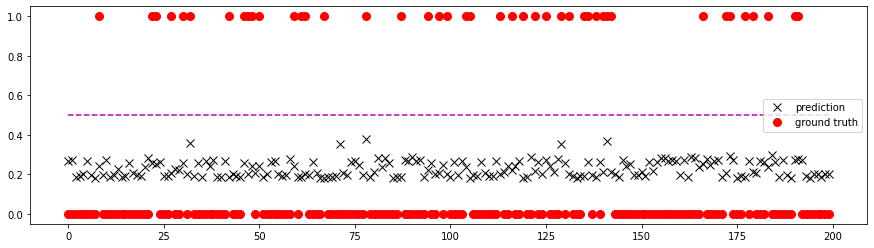

In [9]:
y_pred=model.predict(X_test)
plt.figure(figsize=(15,4))
plt.plot(y_pred,'kx',markersize=8,label ='prediction')
plt.plot(y_test,'ro',markersize=8,label ='ground truth')
plt.plot(0.5*np.ones(np.shape(y_test)),'--m')
plt.legend(loc='center right')
plt.savefig("label_01_result.jpeg")
plt.show()


### Results
The classifier doesn't learn the labeling satisfactorily. We suggest you to play with the code parameters (number of layers, number of neurons, activation function, etc) or anything else. We could not get any improvement in our experiments. It would be interesting if you get something :)
### Question
Why our classifier couldn't learn? Please think and share your views.  